#Installing the package (~1min)

In [1]:
! git clone https://github.com/Emanukka/reos.git

Cloning into 'reos'...
remote: Enumerating objects: 489, done.
remote: Counting objects: 100% (489/489), done.
remote: Compressing objects: 100% (331/331), done.
remote: Total 489 (delta 206), reused 410 (delta 132), pack-reused 0 (from 0)
Receiving objects: 100% (489/489), 1.42 MiB | 8.53 MiB/s, done.
Resolving deltas: 100% (206/206), done.


In [2]:
# install rust compiler
%%bash
curl --proto '=https' --tlsv1.2 -sSf https://sh.rustup.rs -o rustup_script.sh
sh rustup_script.sh -y


  stable-x86_64-unknown-linux-gnu installed - rustc 1.89.0 (29483883e 2025-08-04)


Rust is installed now. Great!

To get started you may need to restart your current shell.
This would reload your PATH environment variable to include
Cargo's bin directory ($HOME/.cargo/bin).

To configure your current shell, you need to source
the corresponding env file under $HOME/.cargo.

This is usually done by running one of the following (note the leading DOT):
. "$HOME/.cargo/env"            # For sh/bash/zsh/ash/dash/pdksh
source "$HOME/.cargo/env.fish"  # For fish
source $"($nu.home-path)/.cargo/env.nu"  # For nushell


info: downloading installer
info: profile set to 'default'
info: default host triple is x86_64-unknown-linux-gnu
info: syncing channel updates for 'stable-x86_64-unknown-linux-gnu'
info: latest update on 2025-08-07, rust version 1.89.0 (29483883e 2025-08-04)
info: downloading component 'cargo'
info: downloading component 'clippy'
info: downloading component 'rust-docs'
info: downloading component 'rust-std'
info: downloading component 'rustc'
info: downloading component 'rustfmt'
info: installing component 'cargo'
info: installing component 'clippy'
info: installing component 'rust-docs'
info: installing component 'rust-std'
info: installing component 'rustc'
info: installing component 'rustfmt'
info: default toolchain set to 'stable-x86_64-unknown-linux-gnu'


In [3]:
%%bash
export PATH="$HOME/.cargo/bin:$PATH"

rustc --version

rustc 1.89.0 (29483883e 2025-08-04)


In [4]:
# install maturin via pip
!pip install maturin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 59.1 MB/s eta 0:00:00


In [5]:
# change the dir to /content/reos/crates/reos_py, then compile reos with maturin
%%bash
export PATH="$HOME/.cargo/bin:$PATH"
cd /content/reos/crates/reos_py
maturin build --release

# .wheel file will be created inside /content/reos/crates/reos_py/target/wheels


    Updating crates.io index
     Locking 50 packages to latest compatible versions
      Adding numpy v0.24.0 (available: v0.25.0)
      Adding pyo3 v0.24.2 (available: v0.25.1)
  Downloaded indoc v2.0.6
  Downloaded approx v0.5.1
  Downloaded itoa v1.0.15
  Downloaded autocfg v1.5.0
  Downloaded inventory v0.3.20
  Downloaded heck v0.5.0
  Downloaded pyo3-build-config v0.24.2
  Downloaded num-complex v0.4.6
  Downloaded matrixmultiply v0.3.10
  Downloaded unindent v0.2.4
  Downloaded thiserror-impl v2.0.13
  Downloaded target-lexicon v0.13.2
  Downloaded unicode-ident v1.0.18
  Downloaded numpy v0.24.0
  Downloaded simba v0.9.0
  Downloaded serde v1.0.219
  Downloaded ndarray v0.16.1
  Downloaded wide v0.7.33
  Downloaded serde_json v1.0.142
  Downloaded libc v0.2.175
  Downloaded nalgebra v0.33.2
  Downloaded pyo3-macros-backend v0.24.2
  Downloaded proc-macro2 v1.0.97
  Downloaded num-integer v0.1.46
  Downloaded typenum v1.18.0
  Downloaded syn v2.0.104
  Downloaded num-bigint v0.

In [6]:
# install the package via pip install
!pip install /content/reos/crates/reos_py/target/wheels/reos-0.1.1-cp311-cp311-manylinux_2_34_x86_64.whl

Processing ./reos/crates/reos_py/target/wheels/reos-0.1.1-cp311-cp311-manylinux_2_34_x86_64.whl


#Auxiliary Functions (are examples too)

## Imports

In [20]:
from reos.reos  import EquationOfState,State,CPAParameters,PhaseEquilibrium,CubicRecord,AssociationRecord

import matplotlib.pyplot as plt
import scipy.optimize as opt
import os

import numpy as np


##How create Parameter Record objects for Cubic and Association contributions


**The parameters are from these articles (their plots were used as comparison tests for the model too):**

- [Ten Years with the CPA (Cubic-Plus-Association) Equation of State. Part 1. Pure Compounds and Self-Associating Systems](https://pubs.acs.org/doi/10.1021/ie051305v)

- [Ten Years with the CPA (Cubic-Plus-Association) Equation of State. Part 2. Cross-Associating and Multicomponent Systems](https://pubs.acs.org/doi/10.1021/ie051306n)

- [Application of the CPA equation of state to organic acids ](https://doi.org/10.1016/j.fluid.2004.08.021)

- [Modeling phase equilibria for acid gas mixtures using the CPA equation of state. Part II: Binary mixtures with CO2](https://doi.org/10.1016/j.fluid.2011.02.006)



In [9]:
import numpy as np
from reos.reos  import EquationOfState,State,CPAParameters,PhaseEquilibrium,CubicRecord,AssociationRecord



c_co2=CubicRecord(
    a0=0.35079,
    b=0.0272e-3,
    c1=0.7602,
    tc=304.12,
)
c_ch4=CubicRecord(
    a0=0.23204,
    b=0.0291e-3,
    c1=0.447,
    tc= 190.56,
)
c_w=CubicRecord(
    a0= 0.12277,
    b=0.0145e-3,
    c1=0.6736,
    tc=647.14,
)

c_acoh=CubicRecord(
    a0= 0.91196,
    b=0.0468e-3,
    c1=0.4644,
    tc=594.8,
)
# antes
c_propanoic=CubicRecord(
    a0= 1.32676,
    b=0.06406e-3,
    c1= 0.6891,
    tc= 607.0,
)
c_methanol_2b=CubicRecord(
    a0= 0.40531,
    b=0.0000309,
    c1=0.4310,
    tc=513.,
)
c_methanol_3b=CubicRecord(
    a0= 4.5897e-1,
    b= 0.0334e-3,
    c1=1.0068,
    tc=513.,
)

c_octanol_2b=CubicRecord(
    a0= 4.15822,
    b=0.1485e-3,
    c1=1.1486,
    tc=655.5,
)
c_octanol_3b=CubicRecord(
    a0= 41.9005e-1,
    b= 0.1489e-3,
    c1= 1.0550,
    tc=655.5,
)
c_octane=CubicRecord(
    a0= 34.8750e-1,
    b=0.1424e-3,
    c1= 0.99415,
    tc=568.7,
)
c_heptane=CubicRecord(
    a0= 29.17800e-1,
    b=0.125350e-3,
    c1= 0.913700,
    tc=540.0,
)

c_h2s=CubicRecord(
    a0= 4.45050e-1,
    b=0.0285e-3,
    c1= 0.60265,
    tc=373.3,
)
a_co2=AssociationRecord.solvate(
    b=0.0272e-3,
    na=0,
    nb=1,
    nc=0)

a_w=AssociationRecord.associative(
    eps=166.55e2,
    beta=0.0692,
    b=0.0145e-3,
    na=2,
    nb=2,
    nc=0)

a_acoh=AssociationRecord.associative(
    eps=403.23e2,
    beta=4.5e-3,
    b=0.0468e-3,
    na=0,
    nb=0,
    nc=1)

a_methanol_2b=AssociationRecord.associative(
    eps=24591.0,
    beta=0.01610,
    b=0.0000309,
    na=1,
    nb=1,
    nc=0)

a_methanol_3b=AssociationRecord.associative(
    eps=160.70e2,
    beta=34.4e-3,
    b= 0.0334e-3,
    na=2,
    nb=1,
    nc=0)

a_propanoic=AssociationRecord.associative(
    eps=399.75e2,
    beta=0.0021,
    b= 0.0641e-3,
    na=0,
    nb=0,
    nc=1)

a_octanol_2b=AssociationRecord.associative(
    eps=267.59e2,
    beta=0.14e-3,
    b= 0.1485e-3,
    na=1,
    nb=1,
    nc=0)
a_octanol_3b=AssociationRecord.associative(
    eps=250.00e2,
    beta= 0.2e-3,
    b= 0.1489e-3,
    na=2,
    nb=1,
    nc=0)


a_octane=AssociationRecord.inert(0.1424e-3)
a_heptane=AssociationRecord.inert(0.125350e-3)
a_ch4=AssociationRecord.inert(0.0291e-3)

a_h2s=AssociationRecord.solvate(
    b=0.0285e-3,
    na=0,
    nb=2,
    nc=0)

# from NIST
# log10, P/BAR,T/Kelvin
# this parameters are useful to construct the phase diagram
# because the method to calculate each point is finding the root
# of TPD; therfore, it's necessary a good initial guess

water_antoine= np.array([6.20963,2354.731,  7.559])
acoh_antoine=np.array([4.68206, 1642.54,    -39.764 ])
co2_antoine=np.array([6.81228,  1301.679,   -3.494])

octane_antoine=np.array([4.04867    ,1355.126   ,-63.633    ])
propanoic_antoine=np.array([4.74558 ,1679.869,  -59.832])

heptane_antoine=np.array([4.02832   ,1268.636   ,-56.199])

octanol_antoine=np.array([6.47682   ,2603.359   ,-48.799    ])
metoh_antoine=np.array([5.20409,    1581.341,   -33.50])

h2s_antoine=np.array([4.52887	,958.587	,-0.539	])


# __all__=[c_co2]


## Using the minTPD function to calculate VLE in mixtures with associative components

In [8]:

def bubble_diagram(

    VAR,
    LIQUID,
    VAPOR,
    x_figsize=5,
    y_figsize=5,
    y_inf=None,
    y_sup=None,
    x_inf=0.0,
    x_sup=1.0,
    x_label="",
    y_label="",
    title="",
    text="",
    bol_linestyle="-",
    orv_linestyle="-",
    exp_data=[None,None,None,None],
    save_fig=None,
    plot_dir="plots",
    factor=1.0):

  """
  Calculate VAR,LIQUID,VAPOR using linspace_bubble_(t or p), and use the values inside this function

  antoine: np.ndarray[[A1,B1,C1],[A2,B2,C2],...[AN,BN,CN]]

  """

  VAR=VAR/factor
  N=len(VAR)
  vz=np.zeros_like(VAR)
  vy=np.zeros_like(VAR)

  for i,vapor in enumerate(VAPOR):

    y1=vapor.composition()[0]
    vy[i]=y1
  for i,liquid in enumerate(LIQUID):
    z1=liquid.composition()[0]

    vz[i]=z1

  plot_dir="phase_diagram_plot"
  if (y_sup==None) and (y_inf==None):

    y_inf=np.min(VAR)*0.5
    y_sup=np.max(VAR)*1.5
  # print(y_inf,y_sup)

  xorv,orv,xbol,bol=exp_data
  # Tamanho e limites
  plt.figure(figsize=(x_figsize, y_figsize))
  plt.xlim(-0.01,1.01)
  plt.ylim(y_inf,y_sup)

  # Bolha
  plt.plot(vy,VAR,label=text,linestyle=bol_linestyle,color='black')
  plt.scatter(xorv,orv,marker='o',facecolors='none',edgecolors='black',)
  # Orvalho
  plt.plot(vz, VAR,linestyle=orv_linestyle,color='black')

  plt.scatter(xbol,bol,marker='o',facecolors='none',edgecolors='black')
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.legend()
  plt.grid(True)

  if save_fig:
    os.makedirs(plot_dir, exist_ok=True)
    filename = f"{title}.png"
    filepath = os.path.join(plot_dir, filename)
    plt.savefig(filepath)
  plt.show()


def linspace_bubble_p(eos,t,antoine,N=100):

  """
    return PRES,LIQUID,VAPOR

  """

  # Composiçaõ do comp1
  vz=np.linspace(0.00001,0.9999,N)
  PRES=np.zeros_like(vz)

  LIQUID=np.zeros_like(vz,dtype=object)
  # print(LIQUID)
  VAPOR=np.zeros_like(vz,dtype=object)
  # print(VAPOR)


  for (i,z1) in enumerate(vz):

    z=np.array([z1,1.0-z1])
    liquid_phase,vapor_phase=bubble_p(eos,t,z,antoine)
    PRES[i]=liquid_phase.pressure()
    LIQUID[i]=liquid_phase
    VAPOR[i]=vapor_phase


  return PRES,LIQUID,VAPOR

def linspace_bubble_t(eos,p,antoine,N=100,tol=1e-8,it_max=100):

  vz=np.linspace(0.00001,0.9999,N)
  TEMP=np.zeros_like(vz)
  LIQUID=np.zeros_like(vz,dtype=object)
  VAPOR=np.zeros_like(vz,dtype=object)

  for (i,z1) in enumerate(vz):

    z=np.array([z1,1.0-z1])

    liquid_phase,vapor_phase=bubble_t(eos,p,z,antoine,tol,it_max)
    TEMP[i]=liquid_phase.temperature()
    LIQUID[i]=liquid_phase
    VAPOR[i]=vapor_phase


  return TEMP,LIQUID,VAPOR





def bubble_p(eos,t,z,antoine,tol=1e-8,it_max=100):

  """
  Return np.ndarray[State(T,Pb,z),State(T,Pb,y)]
  """
  psat=psat_antoine(t,antoine)
  P0=z.dot(psat)
  yguess=(z*psat)/P0
  def F(P):

    # print(P)
    state_z= State.tpx(eos,t,P,z,"liquid")
    dg,state_x=state_z.min_tpd("vapor",yguess,tol,it_max)
    return dg,np.array([state_z,state_x])

    # F=lambda P: peq.tpd(T,P,z,incipient_phase,incipient_phase_guess,tol=tol,it_max=100)[0]
    # F_return_x=lambda X: peq.tpd(T,X,z,incipient_phase,incipient_phase_guess,tol=tol,it_max=100)[1]

  f=lambda x: F(x)[0]

  RESULT=opt.root(f,P0)
  Pbubble=RESULT.x
  _,states=F(Pbubble)
  return states

def bubble_t(eos,p,z,antoine,tol=1e-8,it_max=100):

  """

  z: composition of developd phase
  antoine: np.ndarray[[A1,B1,C1],[A2,B2,C2],...[AN,BN,CN]]
  Return np.ndarray[State(Tb,P,z),State(Tb,P,y)]
  """
  tsat=tsat_antoine(p,antoine)
  T0=z.dot(tsat)
  yguess=(z*tsat)/T0

  def F(T):
    state_z= State.tpx(eos,T,p,z,"liquid")
    dg,state_x=state_z.min_tpd("vapor",yguess,tol,it_max)
    return dg,np.array([state_z,state_x])

    # F=lambda P: peq.tpd(T,P,z,incipient_phase,incipient_phase_guess,tol=tol,it_max=100)[0]
    # F_return_x=lambda X: peq.tpd(T,X,z,incipient_phase,incipient_phase_guess,tol=tol,it_max=100)[1]
  f=lambda x: F(x)[0]

  RESULT=opt.root(f,T0)
  Tbubble=RESULT.x
  _,states=F(Tbubble)
  return states

def psat_antoine(T,v):

  psats=np.zeros(len(v))

  for (i,vec) in enumerate(v):
    a,b,c=vec[0],vec[1],vec[2]

    log=a-b/(T+c)

    psats[i]=(10**log)*1e5

  return psats

def tsat_antoine(P,v):

  tsats=np.zeros(len(v))

  for (i,vec) in enumerate(v):

    a,b,c=vec[0],vec[1],vec[2]

    tsats[i]=b/(a-np.log10(P*1e-5))-c

  return tsats

## Using the minTPD function to calculate water saturation in a natural gas (CO2, CH4,H2S and other alkanes)

In [35]:
import numpy as np
from reos.reos  import EquationOfState,State,CPAParameters,PhaseEquilibrium,CubicRecord,AssociationRecord
import scipy.optimize as opt
tol_tpd=1e-6

def tpd_root_given_tp(eos,eos_pure_water,T,P,y_dry_gas):

  def RES(T,P,v):


    yw=np.exp(v[0])
    # print(yw)

    z=(y_dry_gas/y_dry_gas.sum())*(1.-yw)
    z[0]=yw
    # print(sum(y))
    # print(yw)

    VAPOR=State.tpx(eos,T,P,z,"vapor")
    LIQUID=State.tpx(eos,T,P,z,"liquid")

    muL=LIQUID.ln_phi()+np.log(z)
    muV=VAPOR.ln_phi()+np.log(z)
    GL=np.sum(muL*z)
    GV=np.sum(muV*z)

    s2=State.tpx(eos_pure_water,T,P,np.array([1.0]),"liquid")

    if GL<GV:
        s1=LIQUID
        return ( np.log(yw)+s1.ln_phi()[0] - s2.ln_phi()[0] )

    else:
        s1=VAPOR


        return ( np.log(yw)+s1.ln_phi()[0] - s2.ln_phi()[0] )

  xw=0.9999
  N=len(y_dry_gas)

  xguess=np.zeros(N)
  xguess[:]=(1.0-xw)/(N-1)
  xguess[0]=xw
  fRES = lambda X: RES(T,P,X)

  # print("aqui")
  # print(sum(incipient_phase_guess))
  yguess_log=np.log(2000*1e-6)
  yw_guess_log=opt.root(fRES,yguess_log).x[0]

  # zguess=np.array([yw_guess,1-yw_guess])

  # print("guess=",yw_guess)
#   print(np.exp(yw_guess_log))

  def F(v):

    # print(v)
    yw=np.exp(v[0])
    Z=(y_dry_gas/y_dry_gas.sum())*(1.-yw)

    Z[0]=yw
    # print("Z=",Z)
    LIQUID=State.tpx(eos,T,P,Z,"liquid")
    VAPOR=State.tpx(eos,T,P,Z,"vapor")

    muL=LIQUID.ln_phi()+np.log(Z)
    muV=VAPOR.ln_phi()+np.log(Z)

    GL=np.sum(muL*Z)
    GV=np.sum(muV*Z)

    if GL<GV:

        return LIQUID.min_tpd("vapor",xguess,tol=tol_tpd),LIQUID
    else:

        return VAPOR.min_tpd("liquid",xguess,tol=tol_tpd),VAPOR


    # dg,states=state_z2.min_tpd("liquid",xguess)
    # dg,states=state_z.min_tpd("liquid",xguess,)



  # print(zguess)
  fun=lambda X: F(X)[0][0]

  yw_log_root=opt.root(fun,[yw_guess_log] ).x

  # print(pbol)
  state=F([yw_log_root])[1]

  yw=np.exp(yw_log_root)

  return yw,state


def linspace_wsat(eos,eos_pure_water,T,ydg,pi=1,pf=600,N=100):

  PRESS_BAR=np.linspace(pi,pf,N)
  yw_PPM=np.zeros_like(PRESS_BAR)
  vSTATE=np.zeros_like(PRESS_BAR,dtype=object)

  for (i,P_BAR) in enumerate(PRESS_BAR):

    try:
      # xw=xw*1e-6
      # z=np.array([xw,1-xw])

      P_PA=P_BAR*1e5

      result,state=tpd_root_given_tp(eos,eos_pure_water,T,P_PA,ydg)

      vSTATE[i]=state
      yw_PPM[i]=result[0]*1e6

    except Exception as e:
      print(e)
      pass
      continue

  return PRESS_BAR,yw_PPM,vSTATE

## Experimental data (alkanes + associative / associative+associative)

In [10]:

import numpy as np

acoh_octane={}
xbol=np.array([0.227901684	,
0.294626872	,
0.348514208	,
0.43464031	,
0.477690357	,
0.533389687	,
0.584246917	,
0.609662527	,
0.616375144	,
0.642833301	,
0.6712335	  ,
0.699588183	,
0.704410777	,
0.740644168	,
0.804176691	,
0.824698182	,
0.8344279	  ,
0.856949953	,
0.945520948	,
0.97332293	,
0.993356742,
	1. ]) #psat do puro (nist)


pbol=np.array([26.43155385,
27.81751306,
28.49348245,
29.06416542,
29.27855301,
29.17409888,
29.31781,
29.31871166,
28.60941544,
28.96512127,
29.24994256,
29.28642521,
28.93182912,
29.28788174,
29.25465895,
29.21991027,
28.97191842,
29.18557774,
27.09559356,
24.11653554,
21.42101567,
18.4]) #psat do puro (nist)

xorv=np.array([0.0,0.576884063,
0.608405401,
0.729468756,
0.823742333,
0.924917095,1.0])

porv=np.array([15.9221579209744,
26.47941132,
27.79316817,
26.98149858,
24.00479875,
21.34763422,18.8314758220083])

acoh_octane["bol"]=(xbol,pbol)
acoh_octane["orv"]=(xorv,porv)


xorv = np.array([
    0.860323206205559, 0.5932794656324067, 0.3804740357681534, 0.2838375350140056,
    0.21208791208791206, 0.1750484809308338, 0.16596423184658476, 0.14479422538246067,
    0.12287868993751343, 0.10624218918336563, 0.09038138332255975, 0.07451195862960565,
    0.06017022193492781, 0.043553113553113545, 0.029965524671406993, 0.015634561516914433
])

porv = np.array([
    3.114285714285714, 4.614285714285714, 7.314285714285713, 9.414285714285715,
    11.514285714285714, 13.228571428571428, 13.914285714285713, 14.985714285714286,
    15.885714285714284, 16.785714285714285, 17.257142857142856, 17.9,
    18.15714285714286, 18.67142857142857, 18.928571428571427, 18.97142857142857
])


xbol = np.array([
    1.0, 0.9885240249946131, 0.9688407670760609, 0.9317539323421676,
    0.8909308338720102, 0.8184205990088342, 0.7421719457013574, 0.7044279250161601,
    0.6070825253178195, 0.5067442361560007, 0.40715147597500534, 0.3128571428571428,
    0.2396746390864038, 0.16424046541693593, 0.10312648136177542,
    0.06390648567119152, 0.02920491273432449,0.0
])

pbol = np.array([
    2.2142857142857117, 3.1999999999999993, 4.699999999999999, 7.357142857142854,
    9.328571428571426, 11.557142857142857, 13.14285714285714, 13.87142857142857,
    15.07142857142857, 15.799999999999999, 16.7, 17.214285714285715,
    17.814285714285713, 18.2, 18.757142857142856, 18.84285714285714,
    19.057142857142857, 19.142857142857142
])

propanoic_hep={}

propanoic_hep["bol"]=(xbol,pbol)
propanoic_hep["orv"]=(xorv,porv)

x1 = np.array([
    0.0000, 0.0032, 0.0079, 0.0127, 0.0169, 0.0242, 0.0278, 0.0419, 0.0592, 0.1002,
    0.1477, 0.1635, 0.2064, 0.2646, 0.3662, 0.4390, 0.5053, 0.5823, 0.6433,
    0.7358, 0.8143, 0.8978, 0.9522, 0.9819, 1.0000
])
y1 = np.array([
    0.0000, 0.1564, 0.3085, 0.4072, 0.5053, 0.6062, 0.6674, 0.7691, 0.8432,
    0.9109, 0.9512, 0.9632, 0.9756, 0.9848, 0.9917, 0.9937, 0.9957, 0.9968,
    0.9973, 0.9979, 0.9987, 0.9990, 0.9992, 0.9995, 1.0000
])
T = np.array([
    467.85, 461.88, 455.06, 449.29, 444.51, 437.95, 433.78, 424.43, 414.68,
    401.33, 388.40, 383.64, 377.25, 368.40, 360.18, 355.64, 352.24, 349.62,
    347.13, 344.03, 341.99, 340.06, 338.87, 338.15, 337.75
])
metoh_otctanol={}

metoh_otctanol["bol"]=(x1,T)
metoh_otctanol["orv"]=(y1,T)


xorv=np.array([
0.0                 ,
0.014864237869629149,
0.05386962914556445 ,
0.07203659532756088 ,
0.08488809018134288 ,
0.16600947557588633 ,
0.1806476066002287  ,
0.20105080869139028 ,
0.2746740728639111  ,
0.37138376082339486 ,
0.5080267930076785  ,
0.5537239013233132  ,
0.6273393236399282  ,
0.7462153242934163  ,
0.756420192778958   ,
0.8127430158470842  ,
0.8752752818166972  ,
0.8987786309426568  ,
1.00                ,])


torv=np.array([
 371.47518379349776,
 370.82423133474924,
 371.5275935304689,
 371.5844469857866,
 371.7009246855089,
 373.5202613951968,
 374.28549583401406,
 375.28603822904756,
   378.6401829766378,
 384.11549746773403,
 392.1819702662964,
 394.9494396340467,
 397.94960300604475,
 404.0122725044927,
 404.66003594183957,
 407.07226923705275,
 409.77875510537496,
 410.7199346512008,
 414.719751674563   ,])
xbol=np.array([
0.37690965528508413,
0.4655618363012579 ,
0.6685574252573108 ,
0.7984982845940203 ,
0.8952654794968139 ,
0.9183636660676361 ,
0.9392530632249633 ,
0.9673033818003597 ,
0.9668760006534881 ,
0.9771161574906063 ,
0.984264009148832  ,
0.9900499918314    ,])

tbol=np.array([
373.5543734683875  ,
375.3138245384741,
378.5347100147035,
384.0651004737788,
392.1362783858847,
394.788420192779,
397.7358078745303,
403.92718836791374,
404.63520339813755,
406.8758830256494,
409.52990687796114 ,
410.70916516909,])

propanoic_hep_teb={}

propanoic_hep_teb["orv"]=(xorv,torv)
propanoic_hep_teb["bol"]=(xbol,tbol)


xbol=np.array([-0.0012736632222163924,
0.10119557553656855,
0.11826493711287839,
0.2160830307119626 ,
0.3511709362182816 ,
0.3899987111741204 ,
0.46302965057656004,
0.5919577265111484 ,
0.6944951972282662 ,
0.7519919941168891 ,
1.00526902344905   ,])

pbol=np.array([
    3.484189138988498,
5.337369127313252,
5.532133461710501,
7.385540889896369,
10.019521921411947,
10.897818851731959,
12.99693714320372,
16.169116699392738,
18.902488950213417,
20.61116881344625,
27.884847198319985 ,
])

xorv=np.array([
0.2856910002046959 ,
0.32912064168366156,
0.5463181277150633 ,
0.752723592336793  ,
0.7946483400680806 ,
0.8537296346557701 ,
0.9345807146160436 ,
0.9441066541322032 ,
0.9845454614375717 ,])

porv=np.array([5.328347346155887,
5.570722424812171,
7.418292229896213,
10.048785850208109,
10.878031583815385,
13.026731765009139,
16.00566325254165,
18.890283011000513,
20.550897250252085,])


metoh_acoh={}

metoh_acoh["orv"]=(xorv,porv)
metoh_acoh["bol"]=(xbol,pbol)

yorv=np.array([0.0 ,
0.11182235411849956,
0.16713827254218566,
0.23011778644305642,
0.28236826667586873,
0.35151891599664126,
0.4160771593222677 ,
0.5098548374109986 ,
0.5867208438294396 ,
0.6528060549593382 ,
0.8127034519249572 ,
0.9187716392330076 ,
1.0                ,])

porv=np.array([0.04783176323084533 ,
0.052450510139526334,
0.054236631123687276,
0.05676926970104789,
0.05825678364792897,
0.06033990130784362,
0.061825574841551934,
0.06360594453454801,
0.06508977765508357,
0.06687428827771835,
0.06954196717163004,
0.07176909716231294,
0.07370107089041492,])


pbol=np.array([0.052688196007102964 ,
0.054535539946943504,
0.05705464531945333,
0.058569846941343096,
0.06058944477594773,
0.06210665938158264,
0.0642987986800578,
0.06548300826042258,
0.06683257007699664,
0.07037714688311035,
0.0722414574002315,])

xbol=np.array([0.062395306872182726,
0.10027534741942673,
0.15192994816566863,
0.20525963895698685,
0.2723567007196417,
0.3377139693882686,
0.4357462777773784,
0.5113985204569472,
0.5750303744868689,
0.7538767910163412,
0.8931321308151866,  ])

water_acoh={}

water_acoh["orv"]=(yorv,porv)
water_acoh["bol"]=(xbol,pbol)

## Experimental data (watersat)

In [11]:
#%%
import numpy as np

wsat_data={}
vp=np.array([

14.278933963239453,
22.887302984639774,
50.349309682613764,
62.91380666100669,
62.94999075817431,
63.790840254259834,
86.58682146985753,
457.4824326991456,
483.4109228981112,
507.76798944865453,
])

vy=np.array([
0.002735931278410784 ,
 0.002033627714198890,
 0.001259945927487699,
0.0011187934874890768,
0.0018556332843568842,
 0.002978386659189667,
0.0031874586859063775,
0.003970814627773725,
0.003969160497617492,
 0.003967606617773758,
])

wsat_data[298.15]=(vp,vy)

vp=np.array([
7.448704312852641,
9.494896845130341,
20.486578244852836,
31.362038726218714,
40.80762972719779,
51.052679772629574,
60.547576617759944,
72.45493798029173,
79.69233153249607,
81.31238069746638,
91.08198153143951,
100.63322791274271,
112.54058927527453,
137.16181473681243,
152.2529248931119,
126.85337146318611,
203.04498806094196,
])

vy=np.array([
0.00960105937128005,
0.007930239274217975,
 0.003416246980017048,
 0.002315571489952175,
0.001996914862894536,
 0.0017139274922343302,
 0.0016441667664523069,
0.0017525269245127553,
0.002286889576040181,
0.0024648977608103077,
0.0037818427707066934,
 0.003996534503525367,
 0.004104894661585819,
 0.004392840791429237,
0.004572764860429245,
 0.0043558191461636545,
 0.004971099731635334  ,

])


wsat_data[308.15]=(vp,vy)

vp=np.array([
17.894370145386645,
25.735234082855698,
36.028239085114606,
45.740187353375035,
68.22994061518531,
87.09455303537506,
101.71078343321524,
121.20952334296773,
147.38565293358806,
175.98670781691408,
201.54640016982643,
301.93994023416457,])

vy=np.array([
0.0083668903803132,
 0.006174496644295303,
 0.004608501118568233,
 0.003937360178970919,
0.0034004474272930664,
0.003668903803131989,
 0.004250559284116332,
 0.005369127516778524,
 0.006040268456375838,
 0.006442953020134229,
 0.0068456375838926165,
 0.00778523489932886,
])

wsat_data[323.15]=(vp,vy)

# h2s
vp=np.array([
10.055865921787706,
13.40782122905027 ,
20.670391061452513,
26.815642458100562,
41.34078212290502,
103.35195530726256,
137.7094972067039,
206.56424581005587,
17.039106145251402,
6.703910614525114,
68.71508379888269,])
vy=np.array([
0.007478167340910544,
    0.005985840878443449,
 0.004610704424324152,
 0.0040395235343222285,
0.01830074487895718,
 0.018163969691132084,
0.01801130161176394,
 0.01845317215693827,
 0.005010916329544729,
0.010522217941308684,
0.017971649650035323,
])

wsat_data[310.9]=(vp,vy)


#Example Cases

## Methanol and Octanol (3B + ECR)

In [ ]:
antoine=np.array([metoh_antoine,octanol_antoine])
P=101.32e3

xorv,torv=metoh_otctanol["orv"]
xbol,tbol=metoh_otctanol["bol"]

exp_data=[xorv,torv,xbol,tbol]
p=CPAParameters.from_records(
    cubic=[c_methanol_3b,c_octanol_3b],
    assoc=[a_methanol_3b,a_octanol_3b])

p.set_cubic_binary(0,1,0.0,-0.025)
p.set_assoc_binary(0,1,"ecr")
eos_3b=EquationOfState.cpa(p)

P=101.32e3

VAR,LIQUID,VAPOR=linspace_bubble_t(eos_3b,P,antoine,N=100)

bubble_diagram(
   VAR,
   LIQUID,
   VAPOR,
   title="Methanol(1) and Octanol(2) 3B+ECR ",
   y_label="T/K",
   x_label=r"$x_1,y_1$",
   text=f"{P/1e3}kPa",

   factor=1.0,
   y_figsize=2.5,
   x_figsize=5,
   y_inf=300,y_sup=480,

   exp_data=exp_data)


### Identifying the sites in the mixture

In [27]:
assoc=eos_3b.get_association()
assoc.get_sites_map()

#There are 4 distincts sites in the mixture:
# - from 0 to 1, the 2 sites belong to Methanol (second indice i=0)
# - from 2 to 3, the 2 sites belong to Octanol (second indice i=1)

# The first indice in each tuple is the type of the site:
# 0 = - (negative)
# 1 = + (positve)
# 2 = +-(bivalent)


# The F map doesn't have the multiplcity of each site,
# only the information of : (type,owner)


((0, 0), (1, 0), (0, 1), (1, 1))

In [33]:
xL_example=LIQUID[57].non_bonded_sites()
print(xL_example)


[0.92602103 0.8530374  0.94331046 0.8852704 ]


### Extracting the non-bonded sites from State

In [ ]:
xL=[LIQUID[i].composition()[0] for i in range(100)]
xV=[VAPOR[i].composition()[0] for i in range(100)]

#Get the non-bonded sites fraction from each state
XL=np.array([LIQUID[i].non_bonded_sites() for i in range(100)])
XV=np.array([VAPOR[i].non_bonded_sites() for i in range(100)])

sites=["-MeOH","+MeOH","-OcOH","+OcOH"]

plt.figure(figsize=(5, 2.5))

for (i,s) in enumerate(sites):

    plt.plot(xL,XL[:,i],label=s)

plt.title("Methanol(1) and Octanol(2) 3B+ECR Liquid Phase")
plt.ylabel("Fraction of Non-Bonded Sites")

plt.xlabel(r"$x_1$")
plt.legend()

## Water (4C) and CO2 (1 positive site)

/tmp/ipython-input-1726767319.py:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[0]=yw


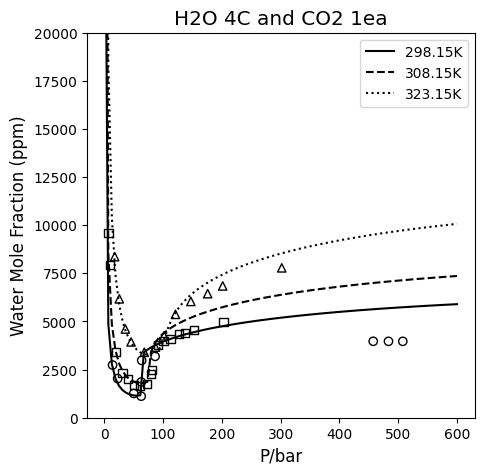

In [36]:
pWATER_CO2=CPAParameters.from_records(
    cubic=[c_w,c_co2],
    assoc=[a_w,a_co2])

pure_water=CPAParameters.from_records(
   [c_w],[a_w]

)

eos_pure_water=EquationOfState.cpa(pure_water)

pWATER_CO2.set_cubic_binary(0,1,kij_a=0.000877,kij_b=-0.15508)

pWATER_CO2.set_assoc_binary(0,1,"mcr1",beta=0.1836)


eos=EquationOfState.cpa(pWATER_CO2)
T=np.array([298.15,308.15,323.15])
# T=np.array([298.15])

ydg=np.array([0.0,0.5]) # Composition of the Dry Gas - 100% CO2
pResultBAR=np.zeros_like(T,dtype=object)
yResultPPM=np.zeros_like(T,dtype=object)
stateResult=np.zeros_like(T,dtype=object)

for (i,temp) in enumerate(T):

  try:

    p,y,s=linspace_wsat(eos,eos_pure_water,temp,ydg)
    pResultBAR[i]=p*1
    yResultPPM[i]=y*1
    stateResult[i]=s

  except Exception as e:
    print(e)
    pass
    continue
#%%
markers = ['o', 's', '^', 'D', 'P', 'X']
lines= ['-','--',':']
plt.figure(figsize=(5, 5))

for (i,t) in enumerate(T):


  pe,ye=wsat_data[t]

  # plt.plot(pResultBAR[i],yResultPPM[i],)
  plt.plot(pResultBAR[i],
           yResultPPM[i],
           color="Black",
           linestyle=lines[i],
           label=f"{t}K")

  plt.scatter(pe,
              ye*1e6,
              marker=markers[i],
              facecolors='none',
              edgecolors='black')

  plt.ylim(0,20*1e3)
  plt.ylabel("Water Mole Fraction (ppm)")
  plt.xlabel("P/bar")

plt.title(f"H2O 4C and CO2 1ea")
plt.legend()
